In [ ]:
!pip install kaleido
!pip install kmodes

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA
import math
import kaleido
from kmodes.kprototypes import KPrototypes
from sklearn.preprocessing import LabelEncoder

In [3]:
df = pd.read_csv('Indian automoble buying behaviour.csv')

In [4]:
df.head()

,Age,Profession,Marrital Status,Education,No of Dependents,Personal loan,Total Salary,Price
0,27,Salaried,Single,Post Graduate,0,Yes,800000,800000
1,35,Salaried,Married,Post Graduate,2,Yes,2000000,1000000
2,45,Business,Married,Graduate,4,Yes,1800000,1200000
3,41,Business,Married,Post Graduate,3,No,2200000,1200000
4,31,Salaried,Married,Post Graduate,2,Yes,2600000,1600000


In [5]:
df.isnull().sum()

Age                 0
Profession          0
Marrital Status     0
Education           0
No of Dependents    0
Personal loan       0
Total Salary        0
Price               0
dtype: int64

In [6]:
df.describe()

,Age,No of Dependents,Total Salary,Price
count,99.000000,99.000000,9.900000e+01,9.900000e+01
mean,36.313131,2.181818,2.270707e+06,1.194040e+06
std,6.246054,1.335265,1.050777e+06,4.376955e+05
min,26.000000,0.000000,2.000000e+05,1.100000e+05
25%,31.000000,2.000000,1.550000e+06,8.000000e+05
50%,36.000000,2.000000,2.100000e+06,1.200000e+06
75%,41.000000,3.000000,2.700000e+06,1.500000e+06
max,51.000000,4.000000,5.200000e+06,3.000000e+06


In [7]:
df.shape

(99, 8)

In [8]:
df.dtypes

Age                  int64
Profession          object
Marrital Status     object
Education           object
No of Dependents     int64
Personal loan       object
Total Salary         int64
Price                int64
dtype: object

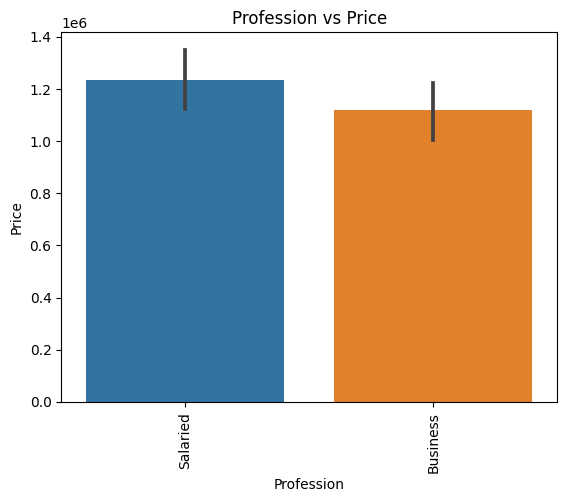

In [9]:
sns.barplot(x = df['Profession'], y=df['Price'])
plt.xticks(rotation = 'vertical')
plt.title('Profession vs Price')
plt.show()

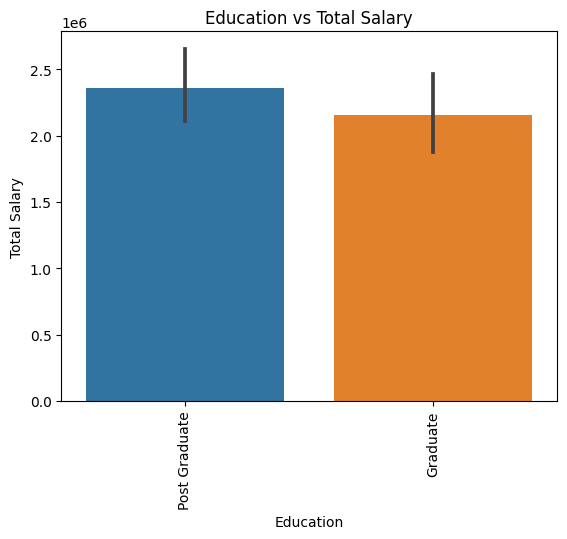

In [10]:
sns.barplot(x = df['Education'], y=df['Total Salary'])
plt.xticks(rotation = 'vertical')
plt.title('Education vs Total Salary')
plt.show()

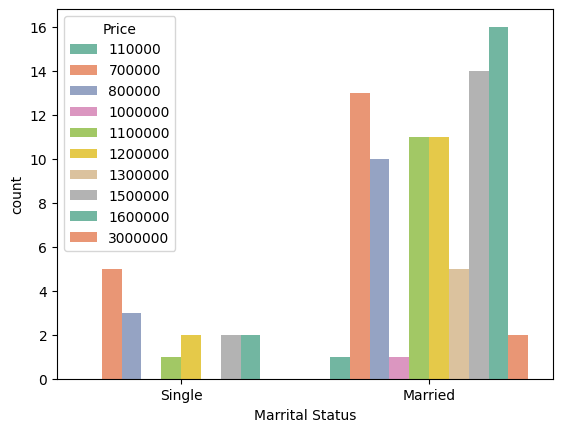

In [11]:
sns.countplot(x ='Marrital Status', hue = 'Price',  data = df, palette = 'Set2')

plt.show()

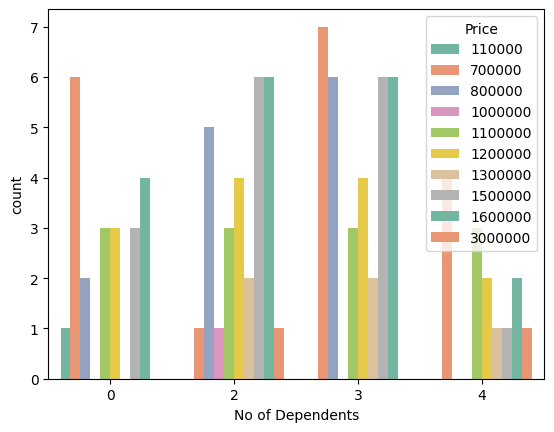

In [12]:
sns.countplot(x ='No of Dependents', hue = 'Price',  data = df, palette = 'Set2')

plt.show()

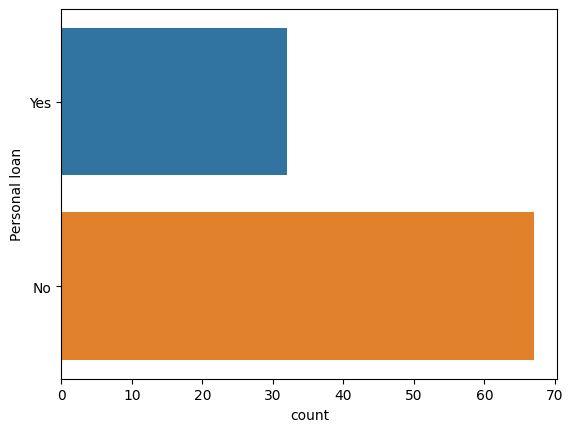

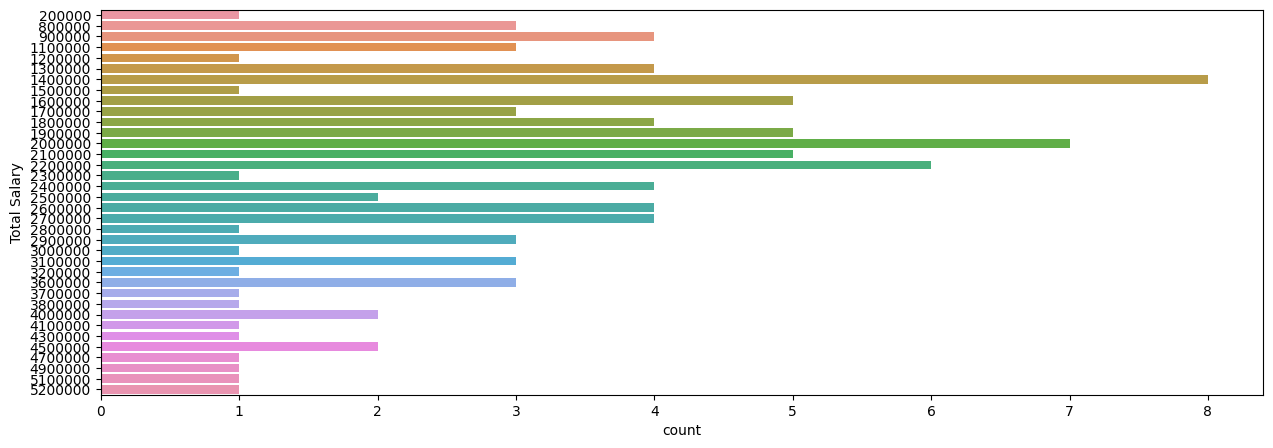

In [13]:
sns.countplot(y='Personal loan',data=df)
plt.show()
plt.figure(figsize=(15,5))
sns.countplot(y='Total Salary',data=df)
plt.show()


<ipython-input-14-6dc1c4c1753e>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True)


<Axes: >

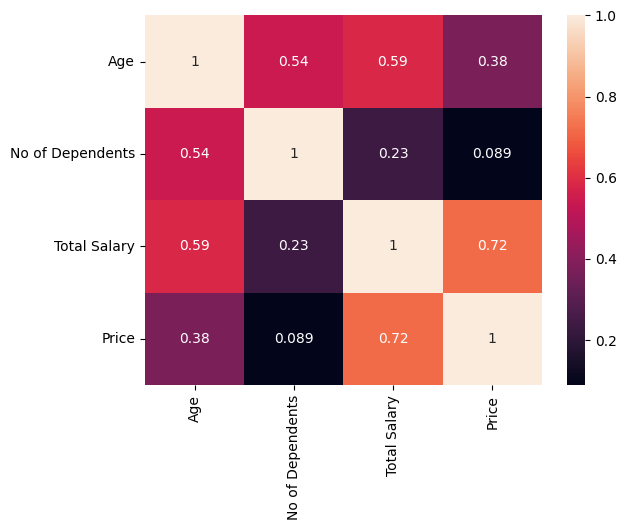

In [14]:
sns.heatmap(df.corr(), annot=True)

In [15]:
a =(df['Marrital Status'].value_counts()['Married'])/((df['Marrital Status'].value_counts()['Married'])+(df['Marrital Status'].value_counts()['Single']))*100
print(math.floor(a),'%')

84 %


In [16]:
df.rename(columns={'Personal loan':'Car_Loan'},inplace=True)
df.rename(columns={'Price':'EV_Price'},inplace=True)
df.head()

,Age,Profession,Marrital Status,Education,No of Dependents,Car_Loan,Total Salary,EV_Price
0,27,Salaried,Single,Post Graduate,0,Yes,800000,800000
1,35,Salaried,Married,Post Graduate,2,Yes,2000000,1000000
2,45,Business,Married,Graduate,4,Yes,1800000,1200000
3,41,Business,Married,Post Graduate,3,No,2200000,1200000
4,31,Salaried,Married,Post Graduate,2,Yes,2600000,1600000


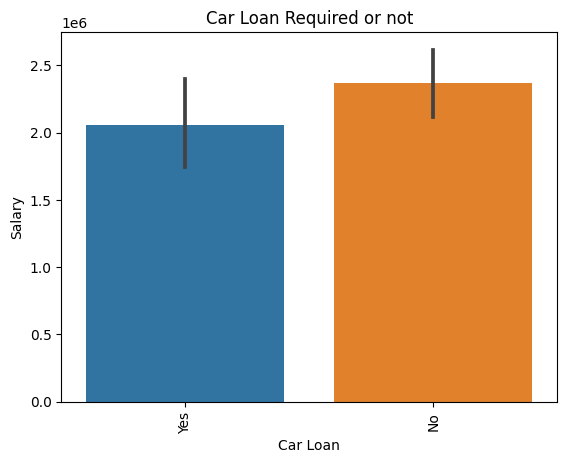

In [17]:
sns.barplot(x = df['Car_Loan'], y=df['Total Salary'])
plt.xticks(rotation = 'vertical')
plt.xlabel('Car Loan')
plt.ylabel('Salary')
plt.title('Car Loan Required or not')
plt.show()

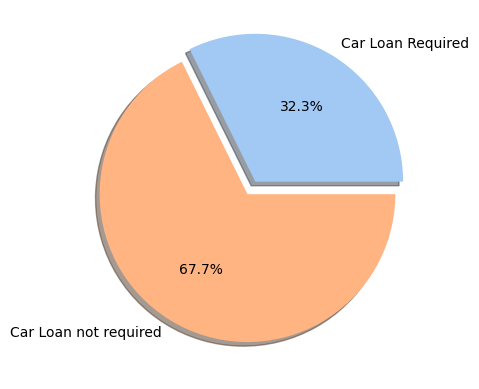

In [18]:
labels = ['Car Loan Required','Car Loan not required']
Loan_status = [df.query('Car_Loan == "Yes"').Car_Loan.count(),df.query('Car_Loan == "No"').Car_Loan.count()]
explode = [0.1, 0]
palette_color = sns.color_palette('pastel')
plt.pie(Loan_status, labels=labels, colors=palette_color, shadow = "True",explode=explode, autopct='%1.1f%%')
plt.show()

In [19]:
features = list(df.columns)
cluster = df[features].values

In [20]:
features

['Age',
 'Profession',
 'Marrital Status',
 'Education',
 'No of Dependents',
 'Car_Loan',
 'Total Salary',
 'EV_Price']

In [21]:
cluster[:, 0] = cluster[:, 0].astype(float)
cluster[:, 4] = cluster[:, 4].astype(float)
cluster[:, 6] = cluster[:, 6].astype(float)
cluster[:, 7] = cluster[:, 7].astype(float)

In [22]:
kproto = KPrototypes(n_clusters=3, verbose=2,max_iter=20)
clusters = kproto.fit_predict(cluster, categorical=[1,2,3,5])

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/20, moves: 7, ncost: 25470392268039.484
Run: 1, iteration: 2/20, moves: 3, ncost: 25155260749352.684
Run: 1, iteration: 3/20, moves: 2, ncost: 25087753148183.234
Run: 1, iteration: 4/20, moves: 0, ncost: 25087753148183.234
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 2, iteration: 1/20, moves: 11, ncost: 26290475678795.82
Run: 2, iteration: 2/20, moves: 7, ncost: 25155260749352.684
Run: 2, iteration: 3/20, moves: 2, ncost: 25087753148183.234
Run: 2, iteration: 4/20, moves: 0, ncost: 25087753148183.234
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 3, iteration: 1/20, moves: 21, ncost: 30795475693382.395
Run: 3, iteration: 2/20, moves: 12, ncost: 27719642159706.797
Run: 3, iteration: 3/20, moves: 10, ncost: 25470392268039.484
Run: 3, it

In [23]:
df['Cluster'] = clusters

In [24]:
df.head()

,Age,Profession,Marrital Status,Education,No of Dependents,Car_Loan,Total Salary,EV_Price,Cluster
0,27,Salaried,Single,Post Graduate,0,Yes,800000,800000,2
1,35,Salaried,Married,Post Graduate,2,Yes,2000000,1000000,0
2,45,Business,Married,Graduate,4,Yes,1800000,1200000,2
3,41,Business,Married,Post Graduate,3,No,2200000,1200000,0
4,31,Salaried,Married,Post Graduate,2,Yes,2600000,1600000,0


In [25]:
df.EV_Price.mean()

1194040.4040404041

In [26]:
df.EV_Price[df.Cluster==0].mean()

1325581.3953488371

In [27]:
df.EV_Price[df.Cluster==1].mean()

1740000.0

In [28]:
df.EV_Price[df.Cluster==2].mean()

856341.4634146341

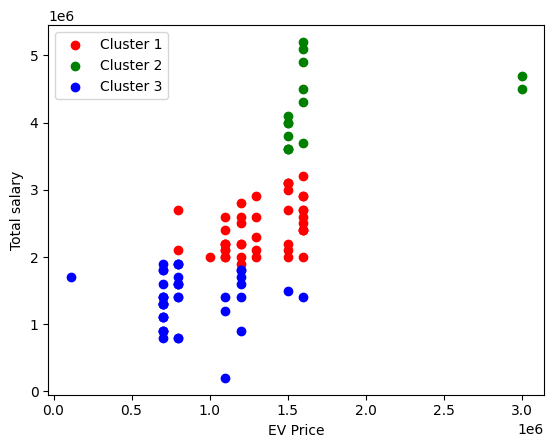

In [29]:
plt.scatter(df[df.Cluster==0].EV_Price, df[df.Cluster==0]['Total Salary'],color='red',label = 'Cluster 1')
plt.scatter(df[df.Cluster==1].EV_Price, df[df.Cluster==1]['Total Salary'],color='green', label = 'Cluster 2')
plt.scatter(df[df.Cluster==2].EV_Price, df[df.Cluster==2]['Total Salary'],color='blue', label = 'Cluster 3')
plt.legend(loc="upper left")

plt.xlabel('EV Price')
plt.ylabel('Total salary')
plt.show()

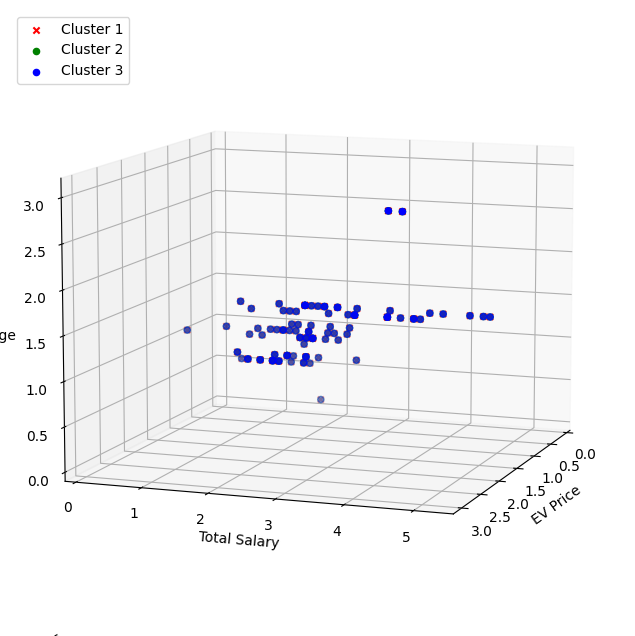

In [31]:
fig = plt.figure(figsize=(18,8))

ax = fig.add_subplot(111, projection='3d')

ax.scatter(df.EV_Price, df['Total Salary'], df['EV_Price'], color='red', marker = 'x', label = 'Cluster 1')
ax.scatter(df.EV_Price, df['Total Salary'],df['EV_Price'], color='green', label = 'Cluster 2')
ax.scatter(df.EV_Price, df['Total Salary'],df['EV_Price'], color='blue', label = 'Cluster 3')
plt.legend(loc = 'upper left')

ax.view_init(10, 20)

plt.xlabel("EV Price")
plt.ylabel("Total Salary")
ax.set_zlabel('Age')
plt.show()

In [32]:
features = [['Age',
 'Profession',
 'Marrital Status',
 'Education',
 'No of Dependents',
 'Car_Loan',
 'Total Salary',
 'EV_Price']]


In [33]:
le = LabelEncoder()
df['Age'] = le.fit_transform(df['Age'])
df['Profession'] = le.fit_transform(df['Profession'])
df['Marrital Status'] = le.fit_transform(df['Marrital Status'])
df['Education'] = le.fit_transform(df['Education'])
df['Car_Loan'] = le.fit_transform(df['Car_Loan'])
df = df.drop('Total Salary', axis  =1)
df =  df.drop('EV_Price', axis  =1)
df = df.drop('Cluster', axis = 1)

In [34]:
df.head()

,Age,Profession,Marrital Status,Education,No of Dependents,Car_Loan
0,1,1,1,1,0,1
1,9,1,0,1,2,1
2,17,0,0,0,4,1
3,13,0,0,1,3,0
4,5,1,0,1,2,1


In [35]:
pca = PCA()
MD_pca = pca.fit(df)

StandardDeviation = np.sqrt(pca.explained_variance_)
ProportionVariance = pca.explained_variance_ratio_
index = []
for i in range(len(StandardDeviation)):
  i = i+1
  index.append(format(i))

sum = pd.DataFrame({"StandardDeviation": StandardDeviation, "Proportion of Variance": ProportionVariance, "Cumulative Proportion": ProportionVariance.cumsum()}, index= index)

In [36]:
sum

,StandardDeviation,Proportion of Variance,Cumulative Proportion
1,5.263873,0.934295,0.934295
2,1.091588,0.040178,0.974473
3,0.527163,0.009370,0.983844
4,0.474308,0.007586,0.991429
5,0.434479,0.006365,0.997794
6,0.255753,0.002206,1.000000


In [37]:
print("Standard Deviation:\n",StandardDeviation.round(1))

Standard Deviation:
 [5.3 1.1 0.5 0.5 0.4 0.3]


In [38]:
weight = (pca.components_)
i=0
transposed_matrix = MD_pca.components_.T

transposed_df = pd.DataFrame(transposed_matrix, index=df.columns.values, columns=index)
transposed_df=round(-transposed_df,3)
transposed_df

,1,2,3,4,5,6
Age,-0.987,0.155,-0.008,-0.015,-0.011,-0.024
Profession,0.001,0.031,0.633,-0.429,0.636,-0.100
Marrital Status,0.042,0.105,0.000,-0.008,-0.165,-0.980
Education,-0.006,0.020,0.772,0.399,-0.487,0.081
No of Dependents,-0.152,-0.977,0.030,0.072,0.048,-0.120
Car_Loan,0.000,-0.097,0.049,-0.807,-0.573,0.093
